In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

##### 3. In class we discussed how to build simulations of the Birth-death Moran process on networks to determine the probability of fixation of a new mutant with selective coefficient s appearing in a random node on the network (same setup as last homework, mutant has (1+s) higher relative probability of birth than wild-type population). Simulate the death-birth process we also mentioned in class: now, at every time step, we first randomly select a node for death, a neighbor node to reproduce, proportional to fitness, followed by the replacement of the death node by the offspring of the birth node. Discuss if and how the probability of mutant fixation is different than the one we saw for the Birth-death process discussed in class. If you observe different fixation probability (for the same parameters), can you provide intuition and discuss why that may be?

In [2]:
def initialize_pop_network(d, num_nodes):
    pop_network = nx.random_regular_graph(d, num_nodes)
    network_population = {i: "B" for i in pop_network.nodes}
    network_population[random.choice(list(pop_network.nodes))] = "A"
    # nx.draw(pop_network)
    return pop_network, network_population, num_nodes

network, ini_population_dict, number_nodes = initialize_pop_network(3, 30)
print(ini_population_dict)


{16: 'B', 29: 'B', 18: 'B', 26: 'B', 12: 'B', 19: 'B', 4: 'B', 15: 'B', 17: 'B', 21: 'B', 9: 'B', 11: 'B', 5: 'B', 22: 'B', 1: 'B', 2: 'B', 14: 'B', 10: 'B', 8: 'B', 27: 'B', 13: 'B', 23: 'A', 24: 'B', 6: 'B', 20: 'B', 7: 'B', 25: 'B', 28: 'B', 0: 'B', 3: 'B'}


In [3]:
def death_birth(net, s, num_simulations, pop_dict, N):
    num_fixations = 0 
    birth_b = 1/(2+s)
    birth_a = (1+s)/(2+s)
    for _ in range(num_simulations):
        population = pop_dict.copy()
        while len(set(population.values())) > 1:
            node_to_die = np.random.choice(list(net.nodes))
            neighbors = list(net.neighbors(node_to_die))
            probabilities = [birth_b if population[n] == "B" else birth_a for n in neighbors]  
            node_to_reproduce = random.choices(neighbors, probabilities)[0]
            population[node_to_die] = population[node_to_reproduce]
        
        if list(population.values()).count('A') == N:  
            num_fixations += 1
    fixation_probability = num_fixations / num_simulations
    return fixation_probability        

In [4]:
s_values = [0, 0.01, 0.1, 0.5, 0.8, 1]
total_probs = dict()
num_simulations = 1000
for s in s_values: 
    probs = death_birth(network, s, num_simulations, ini_population_dict, number_nodes)
    total_probs[s] = probs
print(total_probs)

{0: 0.041, 0.01: 0.033, 0.1: 0.085, 0.5: 0.313, 0.8: 0.389, 1: 0.442}


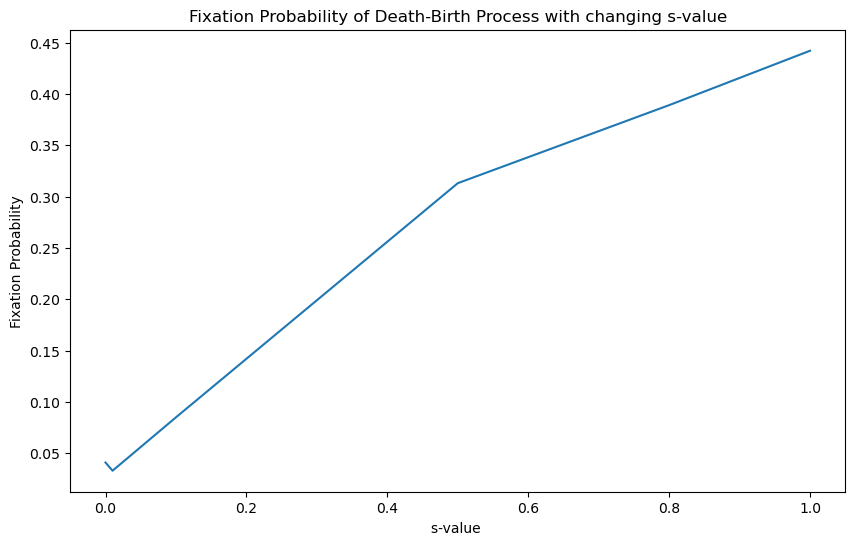

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(list(total_probs.keys()), list(total_probs.values()))
# for i, A_population in enumerate(death_birth_fix_probs):
#     plt.plot(range(len(A_population)), A_population,)

plt.xlabel('s-value ')
plt.ylabel('Fixation Probability')
plt.title('Fixation Probability of Death-Birth Process with changing s-value')
plt.show()

In [6]:
def birth_death(net, s, num_simulations, pop_dict, N):
    num_fixations = 0 
    death_b = 1/(2+s)
    death_a = (1+s)/(2+s)
    for _ in range(num_simulations):
        population = pop_dict.copy()
        while len(set(population.values())) > 1:
            node_to_reproduce = np.random.choice(list(net.nodes))
            neighbors = list(net.neighbors(node_to_reproduce))
            probabilities = [death_b if population[n] == "B" else death_a for n in neighbors]  
            node_to_die = random.choices(neighbors, probabilities)[0]
            population[node_to_reproduce] = population[node_to_die]
        
        if list(population.values()).count('A') == N:  
            num_fixations += 1
    fixation_probability = num_fixations / num_simulations
    return fixation_probability   

In [7]:
s_values = [0, 0.01, 0.1, 0.5, 0.8, 1]
total_probs2 = dict()
num_simulations = 1000
for s in s_values: 
    probs = birth_death(network, s, num_simulations, ini_population_dict, number_nodes)
    total_probs2[s] = probs
print(total_probs2)

{0: 0.035, 0.01: 0.024, 0.1: 0.08, 0.5: 0.291, 0.8: 0.37, 1: 0.426}


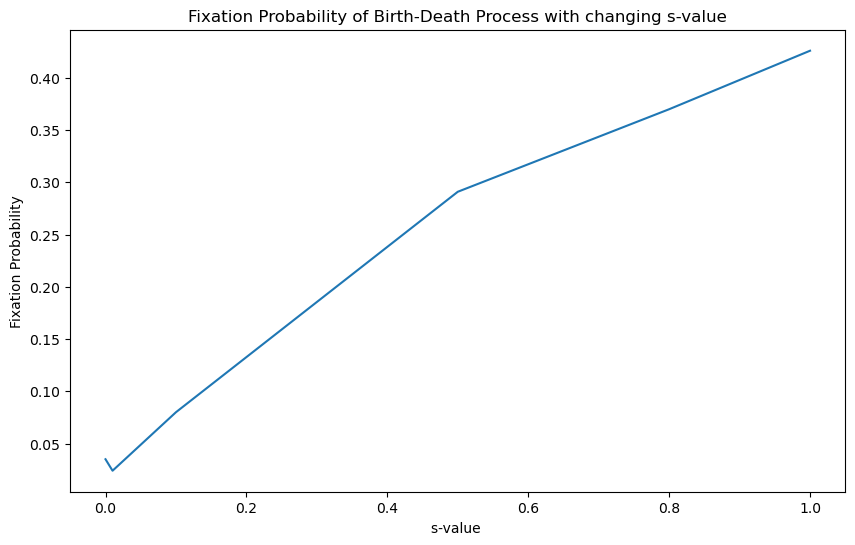

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(list(total_probs2.keys()), list(total_probs2.values()))
plt.xlabel('s-value ')
plt.ylabel('Fixation Probability')
plt.title('Fixation Probability of Birth-Death Process with changing s-value')
plt.show()

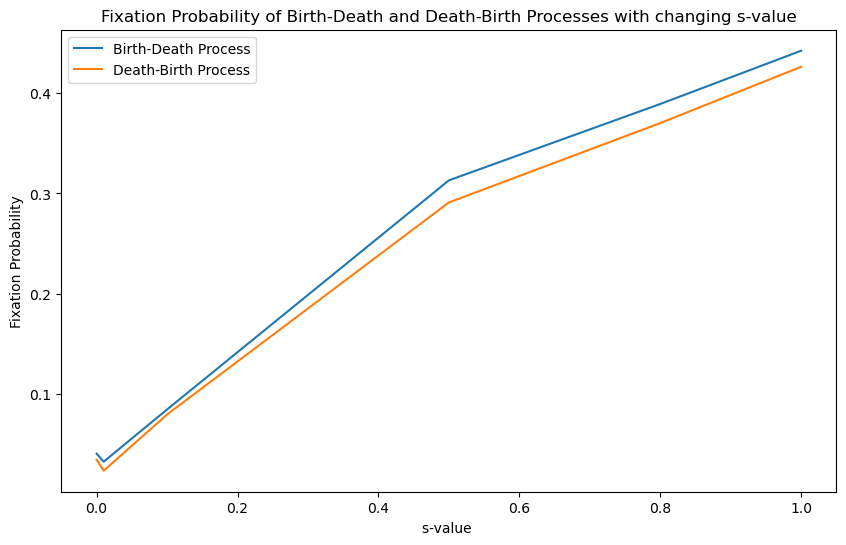

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(list(total_probs.keys()), list(total_probs.values()), label = "Birth-Death Process")
plt.plot(list(total_probs2.keys()), list(total_probs2.values()), label = "Death-Birth Process")
plt.legend()
plt.xlabel('s-value ')
plt.ylabel('Fixation Probability')
plt.title('Fixation Probability of Birth-Death and Death-Birth Processes with changing s-value')
plt.show()

#### 4. The SZR model on networks: For our purposes, consider a random network containing completely susceptible individuals and discrete time updates. We’ll now think of the parameters above as probabilities, and ignore birth processes (θ). Assume that in each time step, all edges convey interactions, meaning each individual interacts with each of their neighbors. Simulate this model for different types of networks and see if you can determine for which network types and spreading parameters will local zombification take off (i.e., grow exponentially, at least in the short term), given one randomly chosen individual becomes the first zombie? (The long term dynamics will likely be complicated so we will focus on the initial dynamics.)

In [18]:
def szr_model(theta, beta, gamma, xi, alpha, t, num_nodes, d, graph_type):
    # create a network
    # random network containing completely susceptible individuals 
    if graph_type == "random_regular_graph":
        pop_network = nx.random_regular_graph(d, num_nodes, seed=1)
    elif graph_type == "erdos_renyi_graph":
        pop_network = nx.erdos_renyi_graph(num_nodes, 0.6)

    network_population = {i: "S" for i in pop_network.nodes}
    # one randomly chose indidividual becomes the first zombie
    node =  random.choice(list(pop_network.nodes))
    network_population[node] = "Z"
    
    states = {'S': 0, 'Z': 1, 'R': 2}
    results = np.zeros((t, 3))
    state_counts = np.array([list(network_population.values()).count(state) for state in states])
    results[0,:] = state_counts
    for i in range(1,t):
        # S, Z, R = 0, 0, 0
        for n in pop_network.nodes:
            node_type = network_population[n]
            neighbors = list(pop_network.neighbors(n))
            susceptible_people = sum(1 for z in pop_network.nodes if network_population[z] == 'S')
            infected_neighbors = sum(1 for neighbor in neighbors if network_population[neighbor] == 'Z')
            recovered_people = sum(1 for j in pop_network.nodes if network_population[j] == 'R')

            prob_of_becoming_a_zombie = beta*infected_neighbors/len(neighbors)
            prob_of_defeating_a_zombie = alpha 
            prob_of_resurrection = xi*recovered_people
            prob_of_background_death = gamma*susceptible_people

            random_chance = np.random.rand()
            if node_type == "S":
                if random_chance < prob_of_background_death:
                    network_population[n] = "R"
                elif random_chance < prob_of_becoming_a_zombie + prob_of_background_death:
                    network_population[n] = "Z"
            elif node_type == "R":
                if random_chance < prob_of_resurrection:
                    network_population[n] = "Z"
            else:
                if random_chance < prob_of_defeating_a_zombie:
                    network_population[n] = "R"
        
        state_counts = np.array([list(network_population.values()).count(state) for state in states])
        results[i, :] = state_counts
    return results

In [19]:
def plot_szr_results(results, t, beta, gamma, xi, alpha, graph_type):
    plt.figure(figsize=(10, 6))
    plt.plot(range(t), results[:, 0], label='Susceptible (S)')
    plt.plot(range(t), results[:, 1], label='Zombie (Z)')
    plt.plot(range(t), results[:, 2], label='Removed (R)')
    plt.xlabel('Time Steps')
    plt.ylabel('Population Count')
    plt.title(f"SZR Model Simulation on {graph_type} Network with beta={beta}, gamma={gamma}, xi={xi}, alpha={alpha}",fontsize=9)
    plt.legend()
    plt.show()

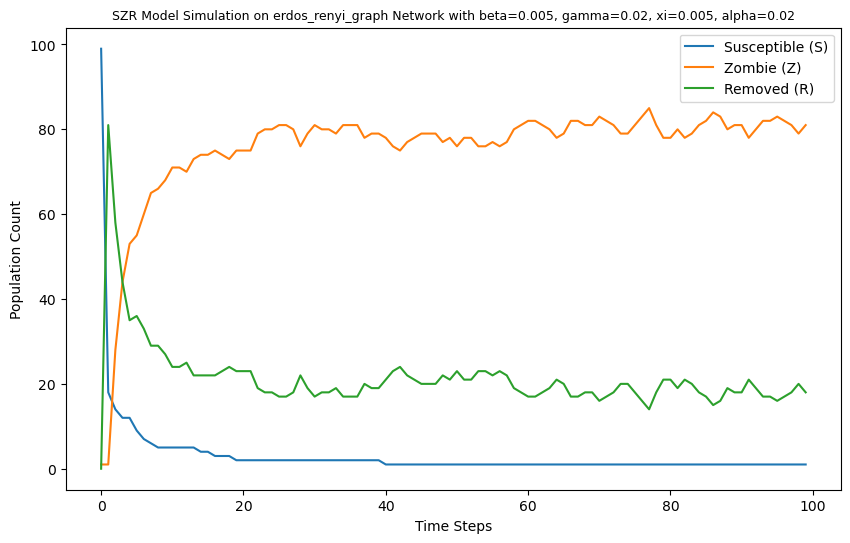

In [21]:
# keeping lower values for beta and xi with erdos graph
theta = 0
beta = 0.005
gamma = 0.02
xi = 0.005
alpha = 0.02
t = 100
num_nodes = 100
d = 3
graph_type = "erdos_renyi_graph"
results = szr_model(theta, beta, gamma, xi, alpha, t, num_nodes, d, graph_type)
plot_szr_results(results, t, beta, gamma, xi, alpha,graph_type)



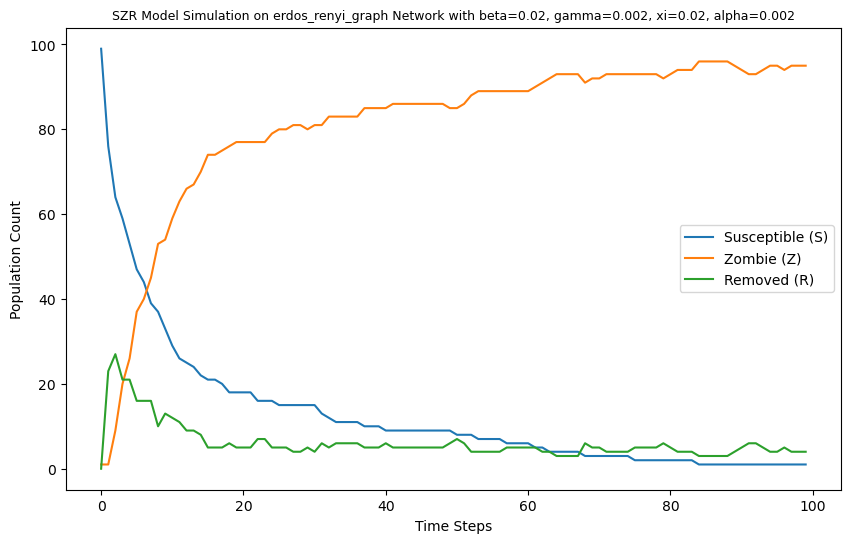

In [22]:
# keeping lower values for gamma and alpha with erdos graph
theta = 0
beta = 0.02
gamma = 0.002
xi = 0.02
alpha = 0.002
t = 100
num_nodes = 100
d = 3
graph_type = "erdos_renyi_graph"
results = szr_model(theta, beta, gamma, xi, alpha, t, num_nodes, d, graph_type)
plot_szr_results(results, t, beta, gamma, xi, alpha,graph_type)



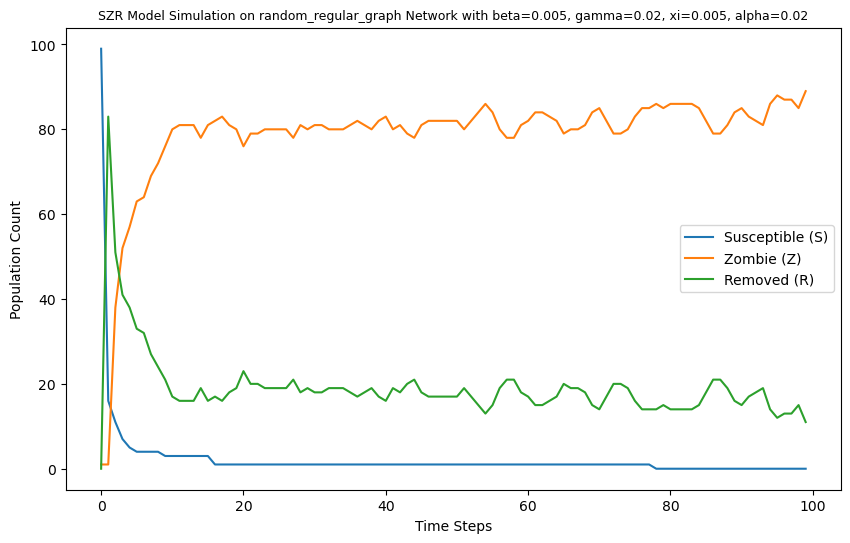

In [23]:
# keeping lower values for beta and xi with random graph
theta = 0
beta = 0.005
gamma = 0.02
xi = 0.005
alpha = 0.02
t = 100
num_nodes = 100
d = 3
graph_type = "random_regular_graph"
results = szr_model(theta, beta, gamma, xi, alpha, t, num_nodes, d, graph_type)
plot_szr_results(results, t, beta, gamma, xi, alpha, graph_type)


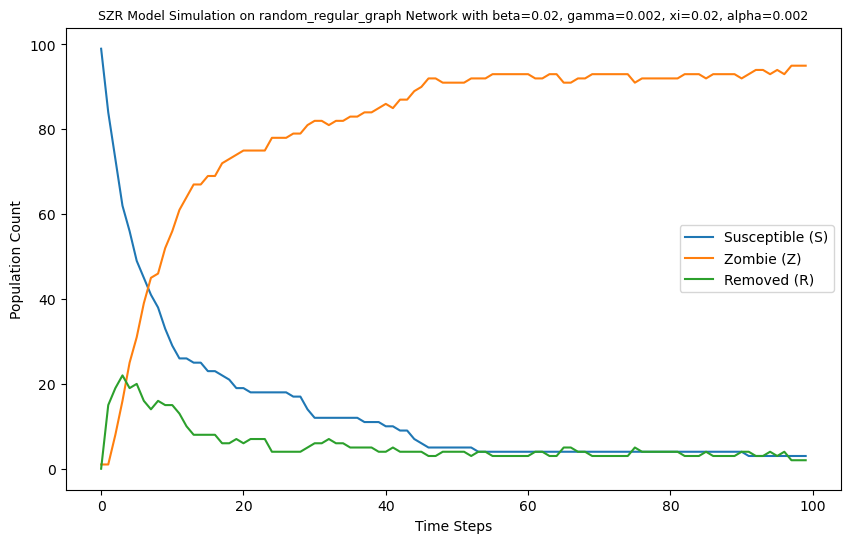

In [24]:
# keeping lower values for gamma and alpha with erdos graph
theta = 0
beta = 0.02
gamma = 0.002
xi = 0.02
alpha = 0.002
t = 100
num_nodes = 100
d = 3
graph_type = "random_regular_graph"
results = szr_model(theta, beta, gamma, xi, alpha, t, num_nodes, d, graph_type)
plot_szr_results(results, t, beta, gamma, xi, alpha, graph_type)